<a href="https://colab.research.google.com/github/crivar96/Predicting-NFL-Play-Yardage/blob/main/Predicting_NFL_Play_Yardage_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing essential libraries for data manipulation, numerical operations, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the datasets for 2021 and 2022 into pandas DataFrames by reading from the URLs with low_memory=False.
data_2021 = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2021.csv', low_memory=False)
data_2022 = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/play_by_play_2022.csv', low_memory=False)

# Combine the 2021 and 2022 data into a single DataFrame for subsequent analysis.
play_by_play = pd.concat([data_2021, data_2022])

# Access the 'qtr' column which represents the quarter of each game.
play_by_play['qtr']


0        1
1        1
2        1
3        1
4        1
        ..
50142    4
50143    4
50144    4
50145    4
50146    4
Name: qtr, Length: 100859, dtype: int64

# Data Cleaning

In [ ]:
# Filter the play_by_play DataFrame to include only rows where the play type is 'run' or 'pass'.
play_by_play = play_by_play.loc[(play_by_play['play_type'] == "run") | (play_by_play['play_type'] == "pass")]

# Remove columns from the DataFrame where all elements are NaN, to clean the dataset.
play_by_play = play_by_play.dropna(axis=1,how='all')

# Selecting a subset of columns relevant for further analysis, focusing on details of the play and game context.
play_by_play = play_by_play[['play_id', 'game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_seconds_remaining', 'drive', 'down', 'ydstogo', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_scramble', 'pass_location', 'air_yards',
 'yards_after_catch', 'run_location', 'run_gap', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential', 'first_down_rush', 'first_down_pass',
'interception', 'safety', 'fumble_lost', 'sack', 'touchdown', 'complete_pass',  'passer_player_id', 'passer_player_name', 'passing_yards', 'receiver_player_id', 'receiver_player_name', 'receiving_yards',
 'rusher_player_id', 'rusher_player_name', 'rushing_yards', 'stadium', 'qtr']]

# Display the concise summary of the play_by_play DataFrame including the dtype and non-null count for each column.
play_by_play.info()

# Replace all NaN/missing values in the DataFrame with 0, which can be particularly useful for numerical columns.
play_by_play = play_by_play.fillna(0)

# Convert specified columns to 'category' dtype to optimize memory usage and improve performance for analyses.
play_by_play = play_by_play.astype({'game_id':'category', 'home_team':'category', 'away_team':'category', 'season_type':'category',
                      'posteam':'category', 'posteam_type':'category', 'defteam':'category', 'side_of_field' : 'category',
                      'play_type' : 'category', 'pass_location' : 'category', 'run_location' : 'category', 'run_gap' : 'category',
                      'passer_player_id' : 'category', 'passer_player_name' : 'category', 'receiver_player_id' : 'category', 'receiver_player_name' : 'category',
                      'rusher_player_id' : 'category', 'rusher_player_name' : 'category', 'stadium' : 'category', 'qtr' : 'category'})


# Converting various numerical columns to integer types with smaller sizes to optimize DataFrame memory usage.
play_by_play = play_by_play.astype({'play_id':'int16', 'week':'int8', 'yardline_100':'int8', 'game_seconds_remaining':'int16', 'drive':'int8', 'down':'int8', 'ydstogo':'int8',
                      'yards_gained':'int8', 'shotgun':'int8', 'no_huddle':'int8', 'qb_scramble':'int8', 'air_yards':'int8', 'yards_after_catch':'int8',
                      'posteam_timeouts_remaining':'int8', 'defteam_timeouts_remaining':'int8', 'posteam_score':'int8', 'defteam_score':'int8', 'score_differential':'int8',
                      'first_down_rush':'int8', 'first_down_pass':'int8', 'interception':'int8', 'safety':'int8', 'fumble_lost':'int8', 'sack':'int8',
                      'touchdown':'int8', 'complete_pass':'int8', 'passing_yards':'int8', 'receiving_yards':'int8', 'rushing_yards':'int8', 'qtr' : 'int8',})

# Select categorical columns for one-hot encoding
categorical_columns = ['home_team', 'away_team', 'posteam_type', 'defteam', 'play_type']

# Initialize encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Apply encoder and transform the data
encoded_columns = encoder.fit_transform(play_by_play[categorical_columns])

# Get feature names after encoding
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names, index=play_by_play.index)

# Combine the encoded DataFrame with the original data, dropping original categorical columns
play_by_play = pd.concat([play_by_play.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Display summary of the updated DataFrame
play_by_play.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71196 entries, 2 to 50145
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   play_id                     71196 non-null  int64  
 1   game_id                     71196 non-null  object 
 2   home_team                   71196 non-null  object 
 3   away_team                   71196 non-null  object 
 4   season_type                 71196 non-null  object 
 5   week                        71196 non-null  int64  
 6   posteam                     71196 non-null  object 
 7   posteam_type                71196 non-null  object 
 8   defteam                     71196 non-null  object 
 9   side_of_field               71196 non-null  object 
 10  yardline_100                71196 non-null  float64
 11  game_seconds_remaining      71196 non-null  float64
 12  drive                       71195 non-null  float64
 13  down                        709

# Data Exploration
Use visualization tools to understand the distribution of data and identify any apparent outliers or missing values. Check for any patterns or trends in the data. Explain your observations about the data, and mention the important insights and possible implications in the next phase of the project.

In [ ]:
# Display the first few rows of the play_by_play DataFrame to get a quick overview of the data.
play_by_play


,play_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,...,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,stadium,qtr
2,55,2021_01_ARI_TEN,TEN,ARI,REG,1,TEN,home,ARI,TEN,...,0,0,0,0,0,00-0032764,D.Henry,-3,Nissan Stadium,1
3,76,2021_01_ARI_TEN,TEN,ARI,REG,1,TEN,home,ARI,TEN,...,R.Tannehill,3,00-0032764,D.Henry,3,0,0,0,Nissan Stadium,1
4,100,2021_01_ARI_TEN,TEN,ARI,REG,1,TEN,home,ARI,TEN,...,R.Tannehill,0,00-0032355,C.Rogers,0,0,0,0,Nissan Stadium,1
6,152,2021_01_ARI_TEN,TEN,ARI,REG,1,ARI,away,TEN,ARI,...,K.Murray,38,00-0030564,D.Hopkins,38,0,0,0,Nissan Stadium,1
7,181,2021_01_ARI_TEN,TEN,ARI,REG,1,ARI,away,TEN,TEN,...,0,0,0,0,0,00-0035228,K.Murray,2,Nissan Stadium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50131,3834,2022_22_KC_PHI,PHI,KC,POST,22,KC,away,PHI,PHI,...,0,0,0,0,0,00-0033873,P.Mahomes,26,0,4
50132,3855,2022_22_KC_PHI,PHI,KC,POST,22,KC,away,PHI,PHI,...,0,0,0,0,0,0,I.Pacheco,2,0,4
50134,3876,2022_22_KC_PHI,PHI,KC,POST,22,KC,away,PHI,PHI,...,P.Mahomes,0,00-0033857,J.Smith-Schuster,0,0,0,0,0,4
50137,3947,2022_22_KC_PHI,PHI,KC,POST,22,KC,away,PHI,PHI,...,0,0,0,0,0,00-0031376,J.McKinnon,10,0,4


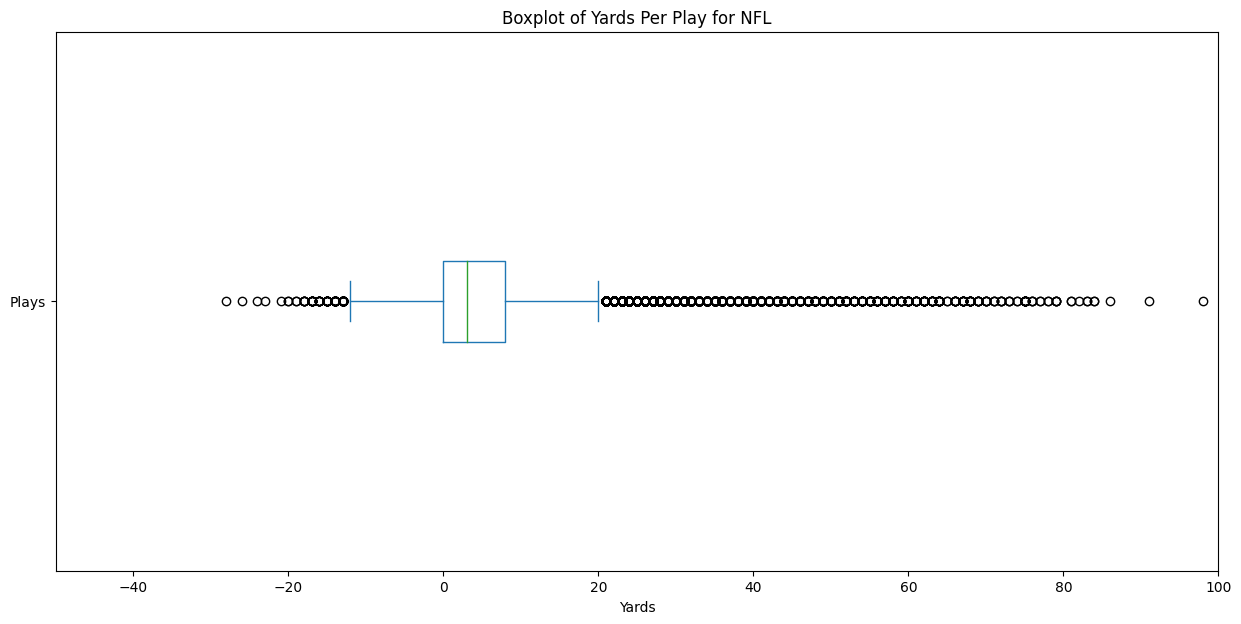

In [ ]:
mask = play_by_play['play_type'] #== 'pass_attempt'

# Plotting 'yards_gained' using a boxplot for visual analysis.
ax = play_by_play['yards_gained'].plot(kind='box', vert=False, figsize=(15,7))

# Set the x-axis limits to focus on a specific range of yards gained.
ax.set_xlim(-50,100)

# Adding a title to the boxplot for clear identification.
ax.set_title('Boxplot of Yards Per Play for NFL')

# Labeling the y-axis with a generic label 'Plays' for the boxplot.
ax.set_yticklabels(['Plays'])

# Setting the label for the x-axis to denote the measure being plotted.
ax.set_xlabel('Yards')

# Displaying the plot.
plt.show()


In [ ]:
# Calculate and display the mean of 'yards_gained across all plays in the DataFrame.
play_by_play['yards_gained'].mean()


5.483510309567953

In [ ]:
# Print the descriptive statistics for all numeric columns in the play_by_play DataFrame.
print(play_by_play.describe())


            play_id          week  yardline_100  game_seconds_remaining  \
count  71196.000000  71196.000000  71196.000000            71196.000000   
mean    2045.582280      9.939870     50.539230             1727.750014   
std     1197.524752      5.613133     24.440011             1049.355518   
min       53.000000      1.000000      1.000000                0.000000   
25%     1004.000000      5.000000     32.000000              809.000000   
50%     2047.000000     10.000000     54.000000             1795.000000   
75%     3059.000000     15.000000     71.000000             2616.000000   
max     5417.000000     22.000000     99.000000             3600.000000   

              drive          down       ydstogo  yards_gained       shotgun  \
count  71196.000000  71196.000000  71196.000000  71196.000000  71196.000000   
mean      11.249845      1.803247      8.408169      5.483510      0.671428   
std        6.556345      0.841710      3.974027      8.503822      0.469697   
min     

In [ ]:
# Print a concise summary of the play_by_play DataFrame, including the dtype and non-null values for each column.
print(play_by_play.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71196 entries, 2 to 50145
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   play_id                     71196 non-null  int16   
 1   game_id                     71196 non-null  category
 2   home_team                   71196 non-null  category
 3   away_team                   71196 non-null  category
 4   season_type                 71196 non-null  category
 5   week                        71196 non-null  int8    
 6   posteam                     71196 non-null  category
 7   posteam_type                71196 non-null  category
 8   defteam                     71196 non-null  category
 9   side_of_field               71196 non-null  category
 10  yardline_100                71196 non-null  int8    
 11  game_seconds_remaining      71196 non-null  int16   
 12  drive                       71196 non-null  int8    
 13  down            

# Model Development

# Model Evaluation

Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

# Load data from a CSV file into a pandas DataFrame.
# play_by_play = pd.read_csv('playByPlay.csv')
# We already have play_by_play loaded into the system, I just gave us that CSV file to have on hand, but it's already in our system

# Filter the DataFrame for run vs pass plays.
runPlays = play_by_play.loc[play_by_play['play_type'] == "run"]
passPlays = play_by_play.loc[play_by_play['play_type'] == "pass"]

# Drop columns with all missing values
runPlays = runPlays.dropna(axis=1, how='all')
passPlays = passPlays.dropna(axis=1, how='all')

# Select the predictor and prediction values.
runX = runPlays[['yardline_100', 'down', 'ydstogo', 'game_seconds_remaining', 'score_differential']]
runY = runPlays[['yards_gained']]

passX = passPlays[['yardline_100', 'down', 'ydstogo', 'game_seconds_remaining', 'score_differential']]
passY = passPlays[['yards_gained']]

#Set training and testing data
passX_train, passX_temp, passY_train, passY_temp = train_test_split(
    passX, passY, test_size=0.2, random_state=0)

passX_test, passX_valid, passY_test, passY_valid = train_test_split(
    passX_temp, passY_temp, test_size=0.5, random_state=0)


runX_train, runX_temp, runY_train, runY_temp = train_test_split(
    runX, runY, test_size=0.2, random_state=0)


runX_test, runX_valid, runY_test, runY_valid = train_test_split(
    runX_temp, runY_temp, test_size=0.5, random_state=0)

# Initialize and fit linear regression models.
regrRun = linear_model.LinearRegression()
regrRun.fit(runX_train, runY_train)

regrPass = linear_model.LinearRegression()
regrPass.fit(passX_train, passY_train)

# Predict the yards gained based off inputs
predictedRun = regrRun.predict(runX_test)
predictedPass = regrPass.predict(passX_test)

predictedRunV = regrRun.predict(runX_valid)
predictedPassV = regrPass.predict(passX_valid)

#Check Accuracy using Root Mean Square Error
rmsRun = mean_squared_error(runY_test, predictedRun, squared=False)
rmsPass = mean_squared_error(passY_test, predictedPass, squared=False)

rmsRunV = mean_squared_error(runY_valid, predictedRunV, squared=False)
rmsPassV = mean_squared_error(passY_valid, predictedPassV, squared=False)

print(f"RMSE for Linear Regression (Run): {rmsRun}")
print(f"RMSE for Linear Regression (Pass): {rmsPass}")
print(f"RMSE for Validation set (Run): {rmsRunV}")
print(f"RMSE for Validation set (Run): {rmsPassV}\n\n")

# Ridge Regression
ridge_regrRun = Ridge(alpha=1.0)
ridge_regrPass = Ridge(alpha=1.0)
ridge_regrRun.fit(runX_train, runY_train)
ridge_regrPass.fit(passX_train, passY_train)
predicted_ridgeRun = ridge_regrRun.predict(runX_test)
predicted_ridgePass = ridge_regrPass.predict(passX_test)
predicted_ridgeRunV = ridge_regrRun.predict(runX_valid)
predicted_ridgePassV = ridge_regrPass.predict(passX_valid)
rmsRun_ridge = mean_squared_error(runY_test, predicted_ridgeRun, squared=False)
rmsPass_ridge = mean_squared_error(passY_test, predicted_ridgePass, squared=False)
rmsRun_ridgeV = mean_squared_error(runY_valid, predicted_ridgeRunV, squared=False)
rmsPass_ridgeV = mean_squared_error(passY_valid, predicted_ridgePassV, squared=False)

print(f"RMSE for Ridge Regression(Run): {rmsRun_ridge}")
print(f"RMSE for Ridge Regression(Pass): {rmsPass_ridge}")
print(f"RMSE for Ridge Regression(Run - Validation): {rmsRun_ridgeV}")
print(f"RMSE for Ridge Regression(Pass - Validation): {rmsPass_ridgeV}\n\n")

# Lasso Regression
lasso_regrRun = Lasso(alpha=0.1)
lasso_regrPass = Lasso(alpha=0.1)
lasso_regrRun.fit(runX_train, runY_train)
lasso_regrPass.fit(passX_train, passY_train)
predicted_lassoRun = lasso_regrRun.predict(runX_test)
predicted_lassoPass = lasso_regrPass.predict(passX_test)
predicted_lassoRunV = lasso_regrRun.predict(runX_valid)
predicted_lassoPassV = lasso_regrPass.predict(passX_valid)
rms_lassoRun = mean_squared_error(runY_test, predicted_lassoRun, squared=False)
rms_lassoPass = mean_squared_error(passY_test, predicted_lassoPass, squared=False)
rms_lassoRunV = mean_squared_error(runY_valid, predicted_lassoRunV, squared=False)
rms_lassoPassV = mean_squared_error(passY_valid, predicted_lassoPassV, squared=False)

print(f"RMSE for Lasso Regression(Run): {rms_lassoRun}")
print(f"RMSE for Lasso Regression(Pass): {rms_lassoPass}")
print(f"RMSE for Lasso Regression(Run- Validation): {rms_lassoRunV}")
print(f"RMSE for Lasso Regression(Pass - Validation): {rms_lassoPassV}")


RMSE for Linear Regression (Run): 6.345121801220203
RMSE for Linear Regression (Pass): 9.801655900700244
RMSE for Validation set (Run): 5.885733944667079
RMSE for Validation set (Run): 9.63262102686803


RMSE for Ridge Regression(Run): 6.345121956456505
RMSE for Ridge Regression(Pass): 9.801655999345279
RMSE for Ridge Regression(Run - Validation): 5.885732944797145
RMSE for Ridge Regression(Pass - Validation): 9.632620827482565


RMSE for Lasso Regression(Run): 6.347727909975682
RMSE for Lasso Regression(Pass): 9.803126932341357
RMSE for Lasso Regression(Run- Validation): 5.883774389831615
RMSE for Lasso Regression(Pass - Validation): 9.63110846302277


In [ ]:

# Initialize Decision Tree Regressor for both run and pass plays
dt_regressor_run = DecisionTreeRegressor(random_state=0)
dt_regressor_pass = DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
dt_regressor_run.fit(runX_train, runY_train)
dt_regressor_pass.fit(passX_train, passY_train)

# Predict on the test set
predicted_run_dt = dt_regressor_run.predict(runX_test)
predicted_pass_dt = dt_regressor_pass.predict(passX_test)
predicted_run_dtV = dt_regressor_run.predict(runX_valid)
predicted_pass_dtV = dt_regressor_pass.predict(passX_valid)

# Calculate RMSE for Decision Tree models
rms_run_dt = mean_squared_error(runY_test, predicted_run_dt, squared=False)
rms_pass_dt = mean_squared_error(passY_test, predicted_pass_dt, squared=False)
rms_run_dtV = mean_squared_error(runY_valid, predicted_run_dtV, squared=False)
rms_pass_dtV = mean_squared_error(passY_valid, predicted_pass_dtV, squared=False)

print(f"RMSE for Descision Tree (Run): {rms_run_dt}")
print(f"RMSE for Descision Tree (Pass): {rms_pass_dt}")
print(f"RMSE for Decision Tree (Run - Validation): {rms_run_dtV}")
print(f"RMSE for Descision Tree (Pass - Validation): {rms_pass_dtV}")



RMSE for Descision Tree (Run): 9.29521480037343
RMSE for Descision Tree (Pass): 14.121105490317909
RMSE for Decision Tree (Run - Validation): 9.69675072320935
RMSE for Descision Tree (Pass - Validation): 13.686029490040733


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

playX = play_by_play[['yardline_100', 'down', 'ydstogo', 'game_seconds_remaining', 'score_differential']]
playY = play_by_play[['yards_gained']]

#This section should be addressed in data cleaning
# Select categorical columns
#categorical_columns = [ 'home_team', 'away_team', 'posteam_type', 'defteam', 'play_type']

#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Initialize encoder
#encoded_columns = encoder.fit_transform(playX[categorical_columns])

# Get the feature names after encoding
#encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the encoded columns
#encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names, index=playX.index)

# Combine the encoded DataFrame with the original data
#playX = pd.concat([playX.drop(categorical_columns, axis=1), encoded_df], axis=1)

playX_train, playX_temp, playY_train, playY_temp = train_test_split(playX, playY, test_size=0.2, random_state=42)

#Get validation set
playX_test, playX_valid, playY_test, playY_valid = train_test_split(playX, playY, test_size=0.5, random_state=42)



# Initialize the model
rf_model = RandomForestRegressor(n_estimators= 200,
                                max_depth= 50,
                                min_samples_split= 2)


rf_model.fit(playX_train, playY_train)



# test
predicted_yardage = rf_model.predict(playX_test)
predicted_yardageV = rf_model.predict(playX_valid)


rmse = mean_squared_error(playY_test, predicted_yardage, squared=False)
rmseV = mean_squared_error(playY_valid, predicted_yardageV, squared=False)

print(f"Root Mean Squared Error: {rmse}")
print(f"Root Mean Squared Error (Validation): {rmseV}")




<ipython-input-22-4c0987c46225>:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(playX_train, playY_train)


Root Mean Squared Error: 3.4085884550143395
Root Mean Squared Error (Validation): 6.255963758146513


# Overfitting vs. Underfitting:

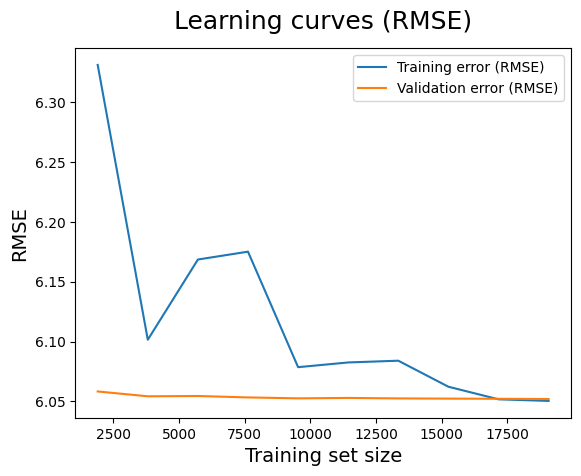

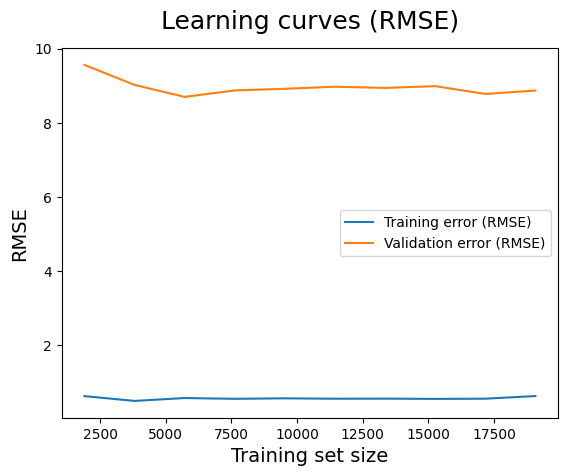

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

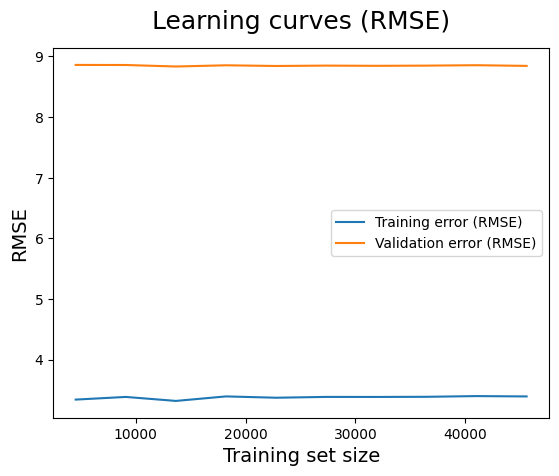

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5, scoring='neg_mean_squared_error')  # Use 'neg_mean_squared_error' for RMSE

    train_scores_mean = np.sqrt(-train_scores.mean(axis=1))  # Calculate RMSE from negative MSE
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis=1))  # Calculate RMSE from negative MSE

    plt.plot(train_sizes, train_scores_mean, label='Training error (RMSE)')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error (RMSE)')

    plt.ylabel('RMSE', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title('Learning curves (RMSE)', fontsize=18, y=1.03)
    plt.legend()

    plt.show()

# Example usage with Linear Regression Model
plot_learning_curves(regrRun, runX_train, runY_train, runX_valid, runY_valid)
plt.show()

# Example usage with Decision Tree Model
plot_learning_curves(dt_regressor_run, runX_train, runY_train, runX_valid, runY_valid)
plt.show()


plot_learning_curves(rf_model, playX_train, playY_train, playX_valid, playY_valid)
plt.show()